In [1]:
#first look at the integrated bathy data on the thredds server. 

from netCDF4 import Dataset, num2date 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as dates
from datetime import datetime
import matplotlib as mpl
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
ibath=Dataset('https://chldata.erdc.dren.mil/thredds/dodsC/cmtb/integratedBathyProduct/survey/survey.ncml')
#print(ibath)

In [3]:
tt=ibath['time']
l=len(tt)
print(l)

132


In [4]:
timedm=num2date(tt[:],units=tt.units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
dtstart=datetime(2019, 1, 1, 0, 0, 0)
dtend=datetime(2020, 1, 1, 0, 0, 0)
dnstart = dates.date2num(dtstart)
dnend = dates.date2num(dtend)
ptime= dates.date2num(timedm)
dates = (ptime >= dnstart) & (ptime <= dnend)


find = np.where(dates > 0)
find=find[0]
print(find)

[114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131]


In [5]:
snum=ibath['surveyNumber'][:]
xfrf=ibath['xFRF'][:]
yfrf=ibath['yFRF'][:]
time=ibath['time'][:]

time2019=time[dates]
survey2019=snum[dates]

print(survey2019[:])
ind_960 = np.where(yfrf==960.0)
index960=ind_960[0]

ll=len(time2019)
print(ll)
elv2019ib=ibath['elevation'][find,index960,:]
twhere=np.where(time==time2019[1])
print(twhere)
#twherehere=twhere[1]

[1159. 1160. 1161. 1162. 1163. 1164. 1165. 1166. 1168. 1169. 1170. 1171.
 1174. 1175. 1176. 1177. 1178. 1179.]
18
(array([115], dtype=int64),)


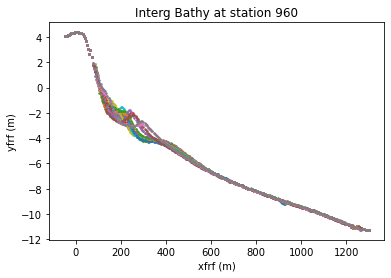

In [6]:
for i in range(ll):
    plt.scatter(xfrf,elv2019ib[i,0,:],s=2)#,c=survey2019[i])
    plt.xlabel('xfrf (m)')
    plt.ylabel('yfrf (m)')
    plt.title('Interg Bathy at station 960')
plt.show()


In [7]:
print(ind_960[0])


[232]


In [8]:
elvall=ibath['elevation'][115,:,:]#all locations first survey of 2019
print(np.shape(elvall))
#print(elvall[:10])

(1040, 271)
[[  3.8515625   3.890625    3.9296875 ... -12.1328125 -12.15625
  -12.171875 ]
 [  3.8515625   3.890625    3.9296875 ... -12.1328125 -12.1484375
  -12.1640625]
 [  3.8515625   3.890625    3.9296875 ... -12.125     -12.1484375
  -12.1640625]
 ...
 [  3.8515625   3.890625    3.9296875 ... -12.1015625 -12.125
  -12.140625 ]
 [  3.8515625   3.890625    3.9375    ... -12.09375   -12.1171875
  -12.1328125]
 [  3.8515625   3.890625    3.9375    ... -12.09375   -12.109375
  -12.1328125]]


(1040, 271)


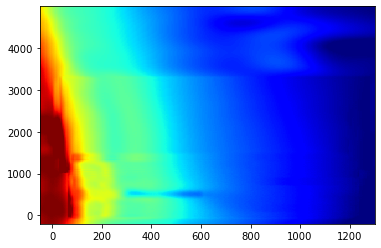

In [9]:
fig=plt.figure()
norm=mpl.cm.colors.Normalize(vmax=np.amax(elv2019ib[0,:,:]),vmin=np.amin(elv2019ib[0,:,:]))
print(np.shape(elvall))
'''
ax0 = fig.add_subplot(1, 1, 1), plt.scatter(X,Y,2,elvdec,norm=norm,cmap='jet')
ax0[0].set_xlabel('xFRF (m)')
ax0[0].set_ylabel('yFRF (m)')
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap='jet'),ax=ax0[0])
cbar.set_label('depth (m)')
'''
plt.pcolormesh(xfrf,yfrf,elvall,norm=norm,cmap='jet')


#ax0[0].set_title("Surveys in the dec 2019")
plt.show()
